# Audio Spectrum Analyzer

In [4]:
import pyaudio
import struct
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib tk

CHUNK = 1024 * 4
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100

In [5]:
import matplotlib.style as style 
import seaborn as sns
style.use('seaborn-darkgrid')
sns.set_context('notebook')
cmap = 'RdYlGn'
sns.set_palette(cmap)

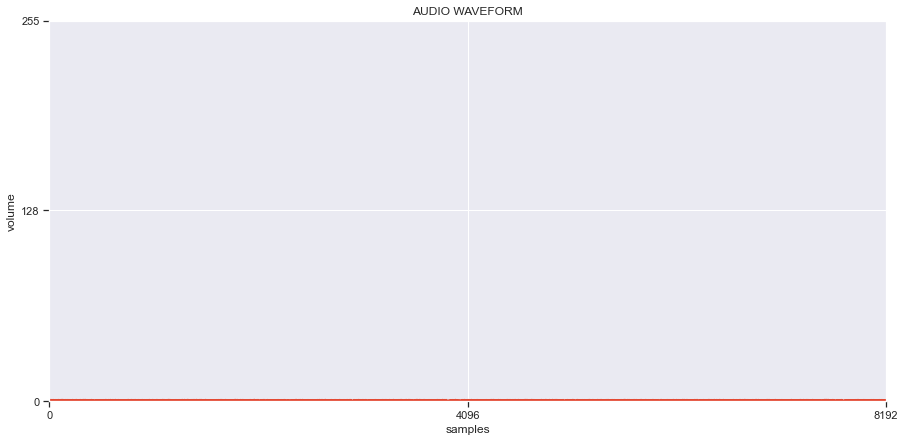

stream started


OSError: [Errno -9981] Input overflowed

In [3]:
# create matplotlib figure and axes
fig, ax = plt.subplots(1, figsize=(15, 7))

p = pyaudio.PyAudio()

stream = p.open(
        format=FORMAT,
        channels=CHANNELS,
        rate=RATE,
        input=True,
        output=True,
        frames_per_buffer=CHUNK)

# variable for plotting
x = np.arange(0, 2 * CHUNK, 2)

# create a line object with random data
line, = ax.plot(x, np.random.rand(CHUNK), '-', lw=2)

# basic formatting for the axes
ax.set_title('AUDIO WAVEFORM')
ax.set_xlabel('samples')
ax.set_ylabel('volume')
ax.set_ylim(0, 255)
ax.set_xlim(0, 2 * CHUNK)
plt.setp(ax, xticks=[0, CHUNK, 2 * CHUNK], yticks=[0, 128, 255])

# show the plot
plt.show(block=False)

print('stream started')

# for measuring frame rate
frame_count = 0
start_time = time.time()

while True:
    
    # binary data
    data = stream.read(CHUNK)  
    
    # convert data to integers, make np array, then offset it by 127
    data_int = struct.unpack(str(2 * CHUNK) + 'B', data)
    
    # create np array and offset by 128
    data_np = np.array(data_int, dtype='b')[::2] + 128
    
    line.set_ydata(data_np)
    
    # update figure canvas
    try:
        fig.canvas.draw()
        fig.canvas.flush_events()
        frame_count += 1
        
    except TclError:
        
        # calculate average frame rate
        frame_rate = frame_count / (time.time() - start_time)
        
        print('stream stopped')
        print('average frame rate = {:.0f} FPS'.format(frame_rate))
        break